In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data_tr = pd.read_csv("../Datasets/Assignments/LRTrain.csv")
# data_test = pd.read_csv("../Datasets/Assignments/LRTest.csv")

data_tr = pd.read_csv("../Kaggle/Datasets/all/Train.csv")
data_test = pd.read_csv("../Kaggle/Datasets/all/Test.csv")
print(data_tr.shape, type(data_tr))
print(data_test.shape)

(1600, 6) <class 'pandas.core.frame.DataFrame'>
(400, 5)


In [3]:
data_tr.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [4]:
data_tr = data_tr.values
data_test = data_test.values

print(data_tr.shape, type(data_tr))
print(data_test.shape, type(data_test))

(1600, 6) <class 'numpy.ndarray'>
(400, 5) <class 'numpy.ndarray'>


In [5]:
X_train = data_tr[:, :5]
Y_train = data_tr[:, -1:]

X_test = data_test[:, :5]
X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))
# Y_test = data_test[:, -1:]

print(X_train.shape, Y_train.shape)     # => Number of features in dataset = 5
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
print(X_train.shape, Y_train.shape)     # => Number of features in dataset = 5

# print(X_test.shape, Y_test.shape)     # => Number of features in dataset = 5

# print(X_train)
ft = 5

(1600, 5) (1600, 1)
(1600, 6) (1600, 1)


## Gradient Descent

In [6]:
def hypothesis(x, theta):
    rv = 0
    for i in range(ft+1):
        rv += theta[i]*x[i]
    return rv

def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0
    for i in range(m):
        hx = hypothesis(X[i], theta)
        total_error += ((hx - Y[i])**2)
    return total_error/2

def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((ft+1,))
    
    for i in range(m):
        for j in range(ft+1):
            hxi = hypothesis(X[i], theta)
            grad[j] += (hxi - Y[i])*X[i][j]
    return grad
        
def gradientDescent(X, Y, lr = 0.001):
    m = X.shape[0]
    theta = np.random.randn(ft+1,)
    error_list = []
    theta_list = []
    
    prev_e = 0
    e = np.inf
    
    while abs(e - prev_e) >= 0.0000000001:
#     for i in range(1000):
        grad = gradient(X, Y, theta)
        prev_e = e
        e = error(X, Y, theta)
        error_list.append(e)
        theta_list.append(theta)
        
        for j in range(ft+1):
            theta[j] = theta[j] - lr*grad[j]
            
    return theta, error_list, theta_list    

### Training with Gradient Descent

In [7]:
final_theta, error_list, theta_list = gradientDescent(X_train, Y_train)
print(final_theta)
print(len(theta_list), len(error_list))

[ 4.99096668 29.68187113 92.66247751  8.28062101 44.76773528  2.51916115]
78 78


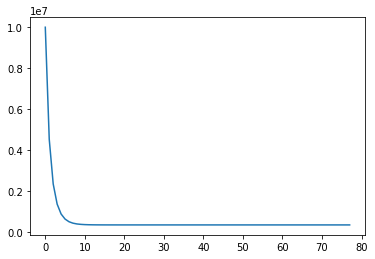

78


In [8]:
plt.plot(error_list)
plt.show()
print(len(error_list))

### Score with Gradient Descent on Training Data

In [9]:
y_pred = np.zeros(Y_train.shape)

m = X_train.shape[0]
for i in range(m):
    y_pred[i] = hypothesis(X_train[i], final_theta)

In [10]:
# Coefficient of Determination

print(Y_train.shape, y_pred.shape)
u = ((Y_train - y_pred)**2).sum()
v = ((Y_train - Y_train.mean())**2).sum()

r2 = 1.0 - u/v
print(r2)

(1600, 1) (1600, 1)
0.9660939669975617


### Score with Gradient Descent on Testing Data

In [11]:
y_pred_test = np.zeros(X_test.shape[0])
m = X_test.shape[0]
for i in range(m):
    y_pred_test[i] = hypothesis(X_test[i], final_theta)
'''
cols = []
for i in range(y_pred_test.shape[0]):
    cols.append(i)
cols = np.array(cols)
cols = cols.reshape((400, 1))

final_y = np.hstack((cols, y_pred_test))
'''

'\ncols = []\nfor i in range(y_pred_test.shape[0]):\n    cols.append(i)\ncols = np.array(cols)\ncols = cols.reshape((400, 1))\n\nfinal_y = np.hstack((cols, y_pred_test))\n'

In [12]:
u = ((Y_test - y_pred_test)**2).sum()
v = ((Y_test - Y_test.mean())**2).sum()

r2 = 1.0 - u/v
print(r2)

NameError: name 'Y_test' is not defined

## Stochastic GD

In [ ]:
def batch_grad(X, Y, theta, bsize=1):
    m = X.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)    
    
    indices = indices[: bsize]    
    grad = np.zeros((ft+1,))
    
    for i in indices:   
        for j in range(ft+1):
            hxi = hypothesis(X[i], theta)
            grad[j] += (hxi - Y[i])*X[i][j]
    return grad

def gradientDescentStochastic(X, Y, lr = 0.001):
    m = X.shape[0]
    theta = np.random.randn(ft+1,)
    error_list = []
    theta_list = []
    
    prev_avg_e = 0
    avg_error = np.inf    # Avg error over last 100 epochs
    e = np.inf
    i = 0
    
    while abs(prev_avg_e - avg_error) >= 100:
#     for i in range(1000):
        grad = batch_grad(X, Y, theta)
        e = error(X, Y, theta)
#         if i % 10:
        error_list.append(e)
        theta_list.append(theta)

        for j in range(ft+1):
            theta[j] = theta[j] - lr*grad[j]
       
        elx = np.array(error_list[-200:-100])
        prev_avg_e = elx.sum()/100
        el = np.array(error_list[-100:])
        avg_error = el.sum()/100
            
    return theta, error_list, theta_list    

### Training with Stochastic Gradient Descent

In [ ]:
final_theta2, error_list2, theta_list2 = gradientDescentStochastic(X_train, Y_train)
print(final_theta2)
print(len(theta_list2), len(error_list2))

In [ ]:
plt.plot(error_list2)
plt.show()

### Score on Training Data

In [ ]:
y_pred2 = np.zeros(Y_train.shape)

m = X_train.shape[0]
for i in range(m):
    y_pred2[i] = hypothesis(X_train[i], final_theta2)

In [ ]:
# Coefficient of Determination
u = ((Y_train - y_pred2)**2).sum()
v = ((Y_train - Y_train.mean())**2).sum()

r2 = 1.0 - u/v
print(r2)

### Score on Testing Data

In [ ]:
y_pred_test2 = np.zeros(X_test.shape[0])
m = X_test.shape[0]
for i in range(m):
    y_pred_test2[i] = hypothesis(X_test[i], final_theta2)
    
    
'''cols = []
for i in range(y_pred_test2.shape[0]):
    cols.append(i)
cols = np.array(cols)
cols = cols.reshape((400, 1))

final_y = np.hstack((cols, y_pred_test2))'''

In [ ]:
u = ((Y_test - y_pred_test2)**2).sum()
v = ((Y_test - Y_test.mean())**2).sum()

r2 = 1.0 - u/v
print(r2)

## Verifying parameters and R2 using library functions

In [13]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [14]:
model = LinearRegression()
model.fit(X_train, Y_train)
print(model.intercept_, model.coef_)
# [ 4.99096674                29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
# [ 4.99096668                29.68187113 92.66247751  8.28062101 44.76773528  2.51916115]


[4.99096674] [[ 0.         29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]]


In [ ]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

In [ ]:
dff = pd.DataFrame(y_pred_test)
dff.to_csv("aqp.csv")

In [ ]:
dff = pd.DataFrame(y_pred_test2)
dff.to_csv("aqp2.csv")